In [1]:
import sys,os

from qiskit import BasicAer,execute
backend = BasicAer.get_backend("dm_simulator")
options={}

# Get the absolute path of the project's root directory
cd = os.path.abspath(os.path.join(os.path.dirname("qsim-superstaq"), '..'))

# Add the utils and models directories to sys.path
sys.path.insert(0, os.path.join(cd, 'supermarq-benchmarks/supermarq/benchmarks'))
sys.path.insert(0, os.path.join(cd, 'supermarq-benchmarks/supermarq'))
sys.path.insert(0, os.path.join(cd, 'supermarq-benchmarks'))

In [2]:
from plotting import *
from converters import *
from benchmarks import GHZ, BitCode, HamiltonianSimulation, MerminBell, PhaseCode, QAOAFermionicSwapProxy, QAOAVanillaProxy, VQEProxy

In [3]:
qubits = 5
shots=1000

In [4]:
def run(benchmark_class,qubits,shots,name):
    
    benchmark_obj = benchmark_class(qubits)
    qc= benchmark_obj.qiskit_circuit()
    print(qc)
    job = execute(qc, backend, shots=shots, **options)
    counts = job.result().results[0].data.partial_probability
    for key in counts.keys():
        counts[key] = int(counts[key] * shots)
    
    print("counts : ",counts)
    score = benchmark_obj.score(counts)
    print("Score : ",score)

    benchmark_name = f"{name}-{qubits}"
    plot_results([score],[benchmark_name])

    features = [
    compute_communication_with_qiskit(qc),
    compute_depth_with_qiskit(qc),
    compute_entanglement_with_qiskit(qc),
    compute_liveness_with_qiskit(qc),
    compute_measurement_with_qiskit(qc),
    compute_parallelism_with_qiskit(qc),
    ]
    print("Features :",features)

    plot_benchmark(title=f"A single {name} benchmark",labels=[benchmark_name],features=[features],
                   spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"] )
    

# GHZ :

     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
counts :  {'00000': 500, '00001': 0, '00010': 0, '00011': 0, '00100': 0, '00101': 0, '00110': 0, '00111': 0, '01000': 0, '01001': 0, '01010': 0, '01011': 0, '01100': 0, '01101': 0, '01110': 0, '01111': 0, '10000': 0, '10001': 0, '10010': 0, '10011': 0, '10100': 0, '10101': 0, '10110': 0, '10111': 0, '11000': 0, '11001': 0, '11010': 0, '11011': 0, '11100': 0, '11101': 0, '11110': 0, '11111': 500}
Sco

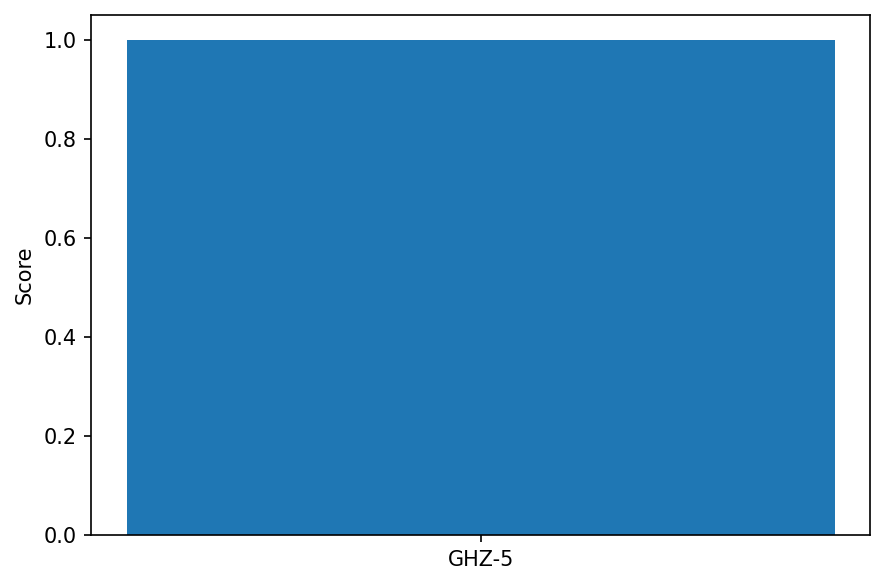

Features : [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0.0]


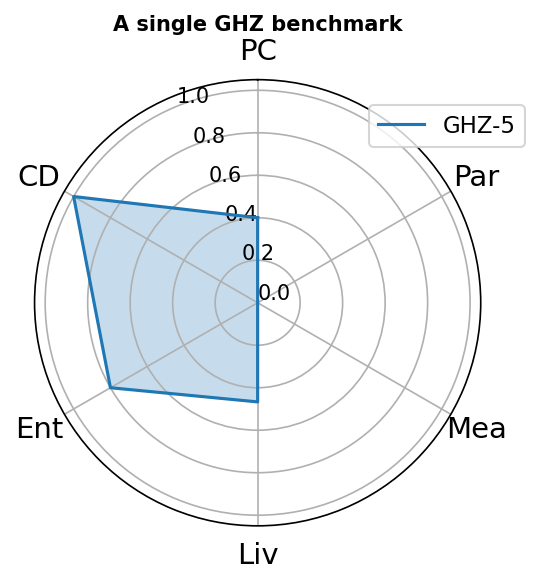

In [5]:
run(GHZ,qubits=qubits,shots=shots,name="GHZ")

# Bitcode

In [6]:
# # '''
# #     Args:
# #         num_data: The number of data qubits.
# #         num_rounds: The number of measurement rounds.
# #         bit_state: A list denoting the state to initialize each data qubit to.

# #     Returns:
# #         A `cirq.Circuit` for the bit-flip error correcting code.
# # '''

# # num_data_qubits = 3
# # num_rounds = 1
# # bit_state = [1, 1, 1]

# qubits = 3

# bc = BitCode(3,1,[1,1,1])
# bc_ckt = bc.circuit()
# #only Cirq's implementation for ckt creation
# bc_ckt = cirq_to_qiskit(bc_ckt)
# print(bc_ckt)

# job = execute(bc_ckt, backend, shots=shots, **options)
# counts = job.result().results[0]#.data.partial_probability
# print(counts)
# for key in counts.keys():
#     counts[key] = int(counts[key] * shots)
    
# print("counts : ",counts)
# score = bc.score(counts)
# print("Score : ",score)

# name = "Bitcode"

# benchmark_name = f"{name}-{qubits}"
# plot_results([score],[benchmark_name])

# features = [
# compute_communication_with_qiskit(bc_ckt),
# compute_depth_with_qiskit(bc_ckt),
# compute_entanglement_with_qiskit(bc_ckt),
# compute_liveness_with_qiskit(bc_ckt),
# compute_measurement_with_qiskit(bc_ckt),
# compute_parallelism_with_qiskit(bc_ckt),
# ]
# print("Features :",features)

# plot_benchmark(title=f"A single {name} benchmark",labels=[benchmark_name],features=[features],
#                    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"] )

# Hamiltonian_Simulation:

     ┌───┐┌───────────┐┌───┐                           ┌─┐                 »
q_0: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──■────────────────■───────┤M├─────────────────»
     ├───┤├───────────┤├───┤┌─┴─┐┌──────────┐┌─┴─┐     └╥┘                 »
q_1: ┤ H ├┤ Rz(-3π/4) ├┤ H ├┤ X ├┤ Rz(-π/2) ├┤ X ├──■───╫───────────────■──»
     ├───┤├───────────┤├───┤└───┘└──────────┘└───┘┌─┴─┐ ║ ┌──────────┐┌─┴─┐»
q_2: ┤ H ├┤ Rz(-3π/4) ├┤ H ├──────────────────────┤ X ├─╫─┤ Rz(-π/2) ├┤ X ├»
     ├───┤├───────────┤├───┤                      └───┘ ║ └──────────┘└───┘»
q_3: ┤ H ├┤ Rz(-3π/4) ├┤ H ├────────────────────────────╫──────────────────»
     ├───┤├───────────┤├───┤                            ║                  »
q_4: ┤ H ├┤ Rz(-3π/4) ├┤ H ├────────────────────────────╫──────────────────»
     └───┘└───────────┘└───┘                            ║                  »
c: 5/═══════════════════════════════════════════════════╩══════════════════»
                                                        0                  »

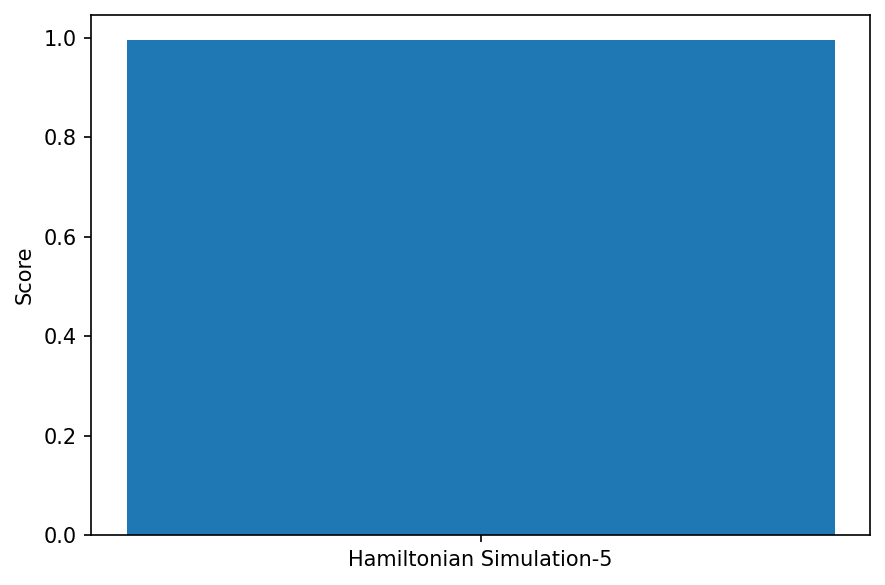

Features : [0.4, 1.0, 0.2962962962962963, 0.5, 0.0, 0.2]


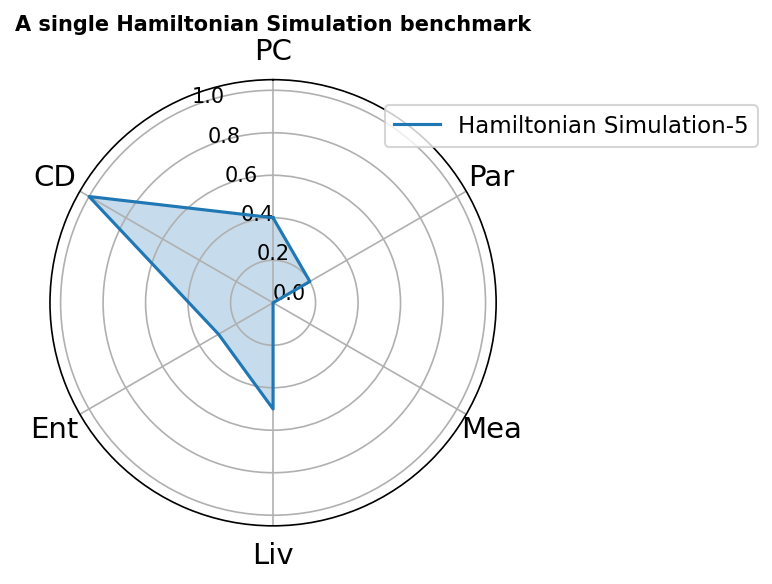

In [7]:
run(HamiltonianSimulation,qubits=qubits,shots=shots,name="Hamiltonian Simulation")

# MerminBell

      ┌──────────┐                                                ┌───┐┌───┐»
 q_0: ┤ Rx(-π/2) ├──■───────────────────────────■─────────────────┤ X ├┤ X ├»
      └──────────┘┌─┴─┐     ┌───┐               │                 └─┬─┘└─┬─┘»
 q_1: ────────────┤ X ├──■──┤ H ├───────────X───┼────■──────────────┼────┼──»
                  └───┘┌─┴─┐└───┘┌───┐      │   │    │              │    │  »
 q_2: ─────────────────┤ X ├──■──┤ H ├──────┼───┼────┼────■─────────┼────┼──»
                       └───┘┌─┴─┐└───┘┌───┐ │   │    │    │         │    │  »
 q_3: ──────────────────────┤ X ├──■──┤ H ├─X───┼────┼────┼────■────┼────■──»
                            └───┘┌─┴─┐├───┤   ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐  │  ┌───┐»
 q_4: ───────────────────────────┤ X ├┤ H ├───┤ X ├┤ X ├┤ X ├┤ X ├──■──┤ S ├»
                                 └───┘└───┘   └───┘└───┘└───┘└───┘     └───┘»
m0: 5/══════════════════════════════════════════════════════════════════════»
                                                                

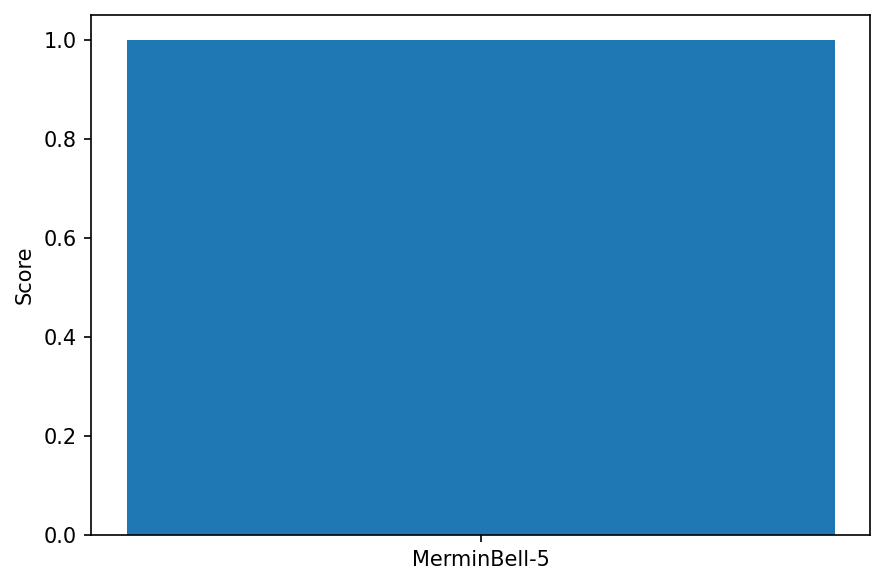

Features : [1.0, 0.8947368421052632, 0.5588235294117647, 0.5043478260869565, 0.0, 0.13636363636363635]


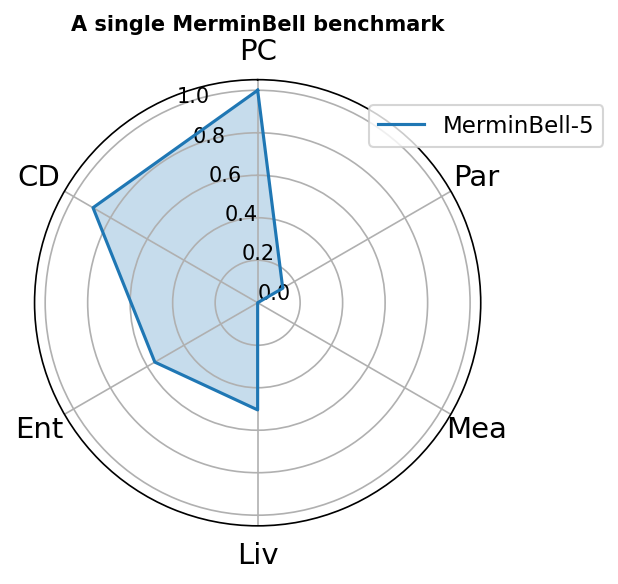

In [8]:
run(MerminBell,qubits=qubits,shots=shots,name="MerminBell")

# PhaseCode :

In [9]:
# # Only cirq circuit implementation is given


# # num_data_qubits = 3
# # num_rounds = 1
# # phase_state = [1, 1, 1]

# qubits = 3

# pc = PhaseCode(3, 1, [1, 1, 1])
# pc_ckt = bc.circuit()
# #only Cirq's implementation for ckt creation
# pc_ckt = cirq_to_qiskit(pc_ckt)
# print(pc_ckt)

# job = execute(pc_ckt, backend, shots=shots, **options)
# counts = job.result().results[0].data.partial_probability
# for key in counts.keys():
#     counts[key] = int(counts[key] * shots)
    
# print("counts : ",counts)
# score = pc.score(counts)
# print("Score : ",score)

# name = "Bitcode"

# benchmark_name = f"{name}-{qubits}"
# plot_results([score],[benchmark_name])

# features = [
# compute_communication_with_qiskit(pc_ckt),
# compute_depth_with_qiskit(pc_ckt),
# compute_entanglement_with_qiskit(pc_ckt),
# compute_liveness_with_qiskit(pc_ckt),
# compute_measurement_with_qiskit(pc_ckt),
# compute_parallelism_with_qiskit(pc_ckt),
# ]
# print("Features :",features)

# plot_benchmark(title=f"A single {name} benchmark",labels=[benchmark_name],features=[features],
#                    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"] )

#  QAOAFermionicSwapProxy:

      ┌───┐                   ┌───┐                                       »
 q_0: ┤ H ├──■────────────────┤ X ├──■─────────────────────────────────■──»
      ├───┤┌─┴─┐┌────────────┐└─┬─┘┌─┴─┐                   ┌───┐     ┌─┴─┐»
 q_1: ┤ H ├┤ X ├┤ Rz(12.067) ├──■──┤ X ├──■────────────────┤ X ├──■──┤ X ├»
      ├───┤└───┘└────────────┘┌───┐└───┘┌─┴─┐┌────────────┐└─┬─┘┌─┴─┐└───┘»
 q_2: ┤ H ├──■────────────────┤ X ├──■──┤ X ├┤ Rz(12.067) ├──■──┤ X ├──■──»
      ├───┤┌─┴─┐┌────────────┐└─┬─┘┌─┴─┐└───┘└────────────┘┌───┐└───┘┌─┴─┐»
 q_3: ┤ H ├┤ X ├┤ Rz(12.067) ├──■──┤ X ├──■────────────────┤ X ├──■──┤ X ├»
      ├───┤└───┘└────────────┘     └───┘┌─┴─┐┌────────────┐└─┬─┘┌─┴─┐└───┘»
 q_4: ┤ H ├─────────────────────────────┤ X ├┤ Rz(12.067) ├──■──┤ X ├─────»
      └───┘                             └───┘└────────────┘     └───┘     »
m0: 5/════════════════════════════════════════════════════════════════════»
                                                                          »
«           

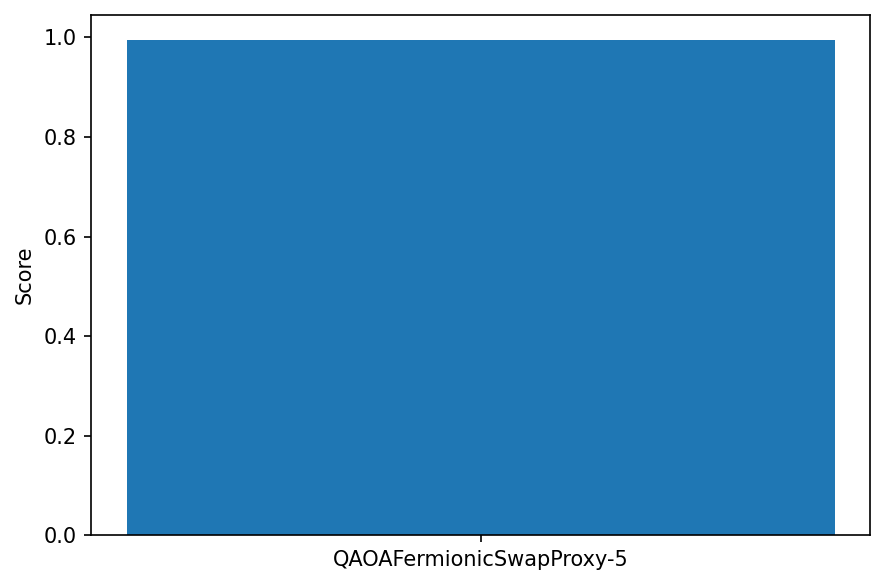

Features : [0.4, 0.5, 0.6, 0.7391304347826086, 0.0, 0.31818181818181823]


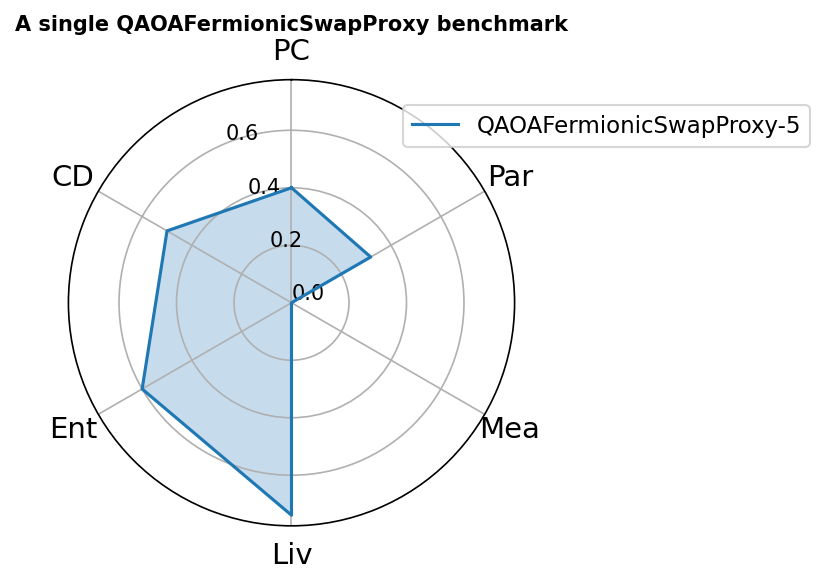

In [10]:
run(QAOAFermionicSwapProxy,qubits=qubits,shots=shots,name="QAOAFermionicSwapProxy")

# QAOAVanillaProxy :

      ┌───┐                                                                 »
 q_0: ┤ H ├──■────────────────────────■─────────────────────────────────────»
      ├───┤  │                        │                                     »
 q_1: ┤ H ├──┼────■───────────────────┼────■────────────────────────────────»
      ├───┤┌─┴─┐  │  ┌─────────────┐┌─┴─┐  │                                »
 q_2: ┤ H ├┤ X ├──┼──┤ Rz(-7.8541) ├┤ X ├──┼─────────────────────────────■──»
      ├───┤└───┘┌─┴─┐├─────────────┤└───┘┌─┴─┐                         ┌─┴─┐»
 q_3: ┤ H ├─────┤ X ├┤ Rz(-7.8541) ├─────┤ X ├──■───────────────────■──┤ X ├»
      ├───┤     └───┘└─────────────┘     └───┘┌─┴─┐┌─────────────┐┌─┴─┐└───┘»
 q_4: ┤ H ├───────────────────────────────────┤ X ├┤ Rz(-7.8541) ├┤ X ├─────»
      └───┘                                   └───┘└─────────────┘└───┘     »
m0: 5/══════════════════════════════════════════════════════════════════════»
                                                                

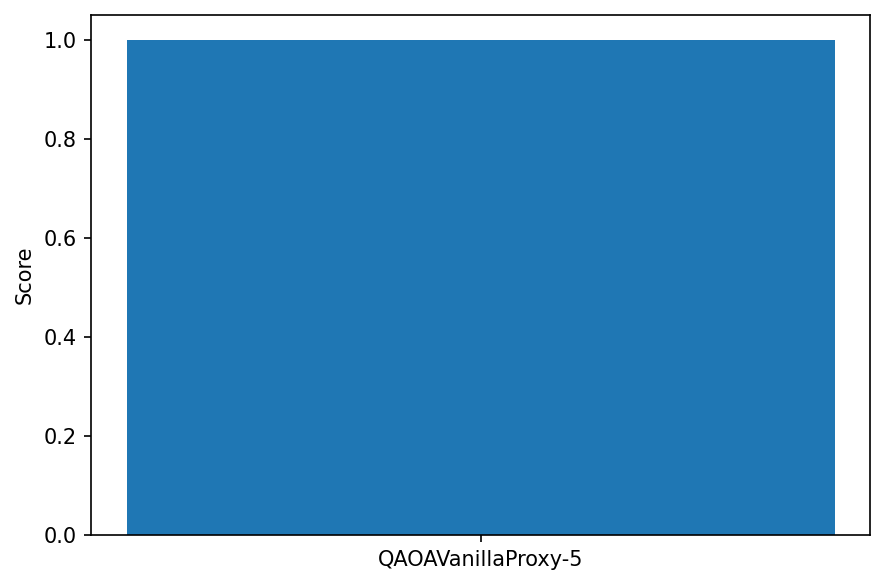

Features : [1.0, 0.8, 0.5, 0.48148148148148145, 0.0, 0.13461538461538464]


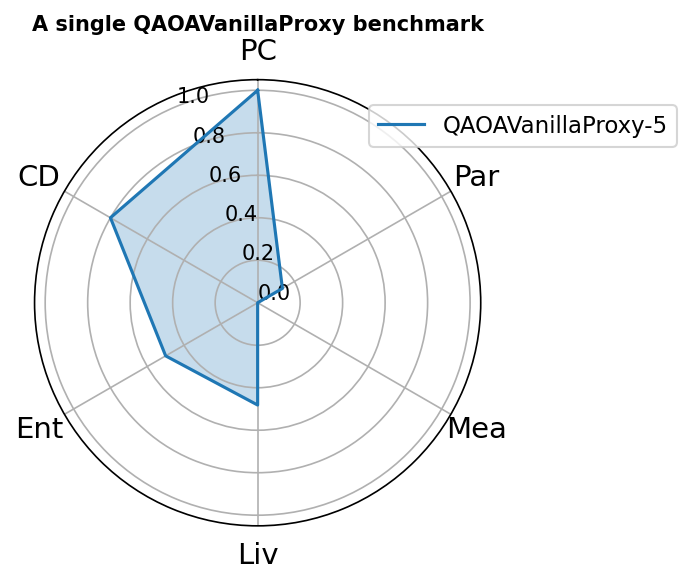

In [11]:
run(QAOAVanillaProxy,qubits=qubits,shots=shots,name="QAOAVanillaProxy")

# VQEProxy:

0: ───Ry(-0.998π)───Rz(1.96π)─────@───Ry(0.17π)───Rz(π)─────────────────────M───
                                  │                                         │
1: ───Ry(-0.036π)───Rz(-0.753π)───X───@───────────Ry(0.181π)───Rz(0.989π)───M───
                                      │                                     │
2: ───Ry(-1.84π)────Rz(1.65π)─────────X───────────Ry(0.181π)───Rz(1.32π)────M───
0: ───Ry(-0.998π)───Rz(1.96π)─────@───Ry(0.17π)───Rz(π)────────H────────────────M───
                                  │                                             │
1: ───Ry(-0.036π)───Rz(-0.753π)───X───@───────────Ry(0.181π)───Rz(0.989π)───H───M───
                                      │                                         │
2: ───Ry(-1.84π)────Rz(1.65π)─────────X───────────Ry(0.181π)───Rz(1.32π)────H───M───
Final Counts: [{'000': 1, '001': 4, '010': 4, '011': 60, '100': 14, '101': 57, '110': 57, '111': 802}, {'000': 452, '001': 121, '010': 121, '011': 59, '100': 147, '101': 40, '110': 3

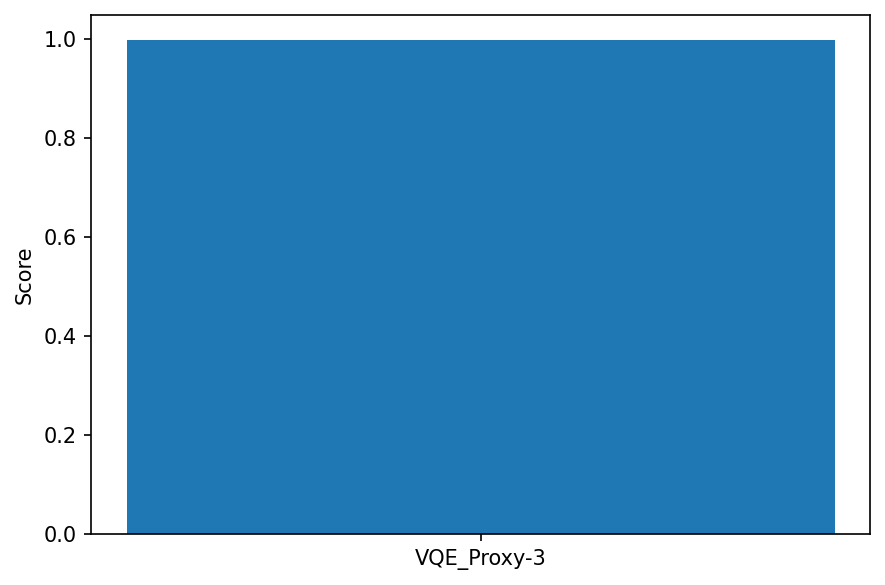

Features for ckt circuit-243: [0.6666666666666666, 1.0, 0.14285714285714285, 0.9047619047619048, 0.0, 0.6666666666666667]


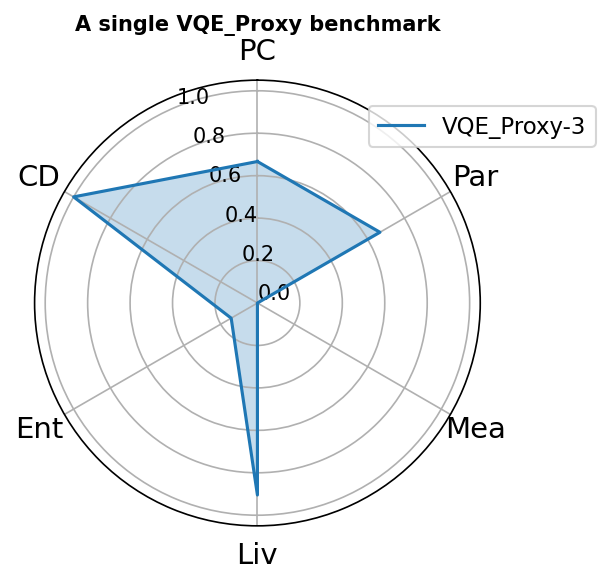

Features for ckt circuit-245: [0.6666666666666666, 1.0, 0.11764705882352941, 0.9166666666666666, 0.0, 0.7142857142857142]


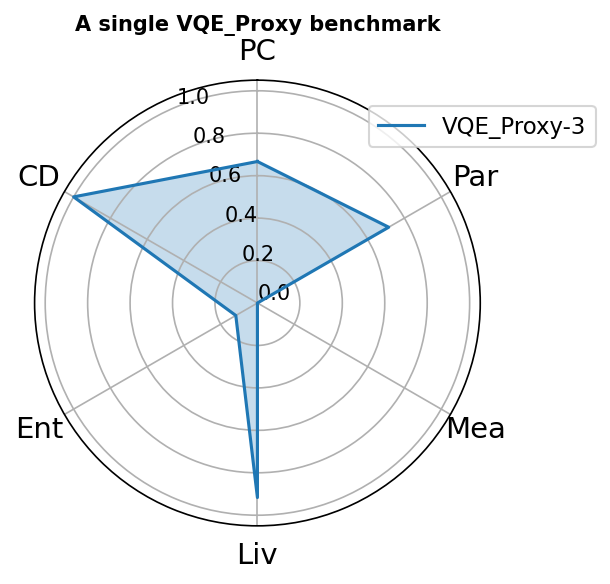

In [12]:
import simulation
vqe = VQEProxy(3, 1)

ckts =  vqe.circuit()
for i in ckts:
    print(i)

final_counts = []
ckt_list = []

for i in ckts:
    ckt_list.append(cirq_to_qiskit(i))

for i in ckt_list:
    job = execute(i, backend, shots=shots, **options)
    counts = job.result().results[0].data.partial_probability
    for key in counts.keys():
        counts[key] = int(counts[key] * shots)

    final_counts.append(counts)

print("Final Counts:",final_counts)
print("########################################################")
score_vqe = vqe.score(final_counts)
print(score_vqe)

name = "VQE_Proxy"
qubits = vqe.num_qubits

benchmark_name = f"{name}-{qubits}"
plot_results([score_vqe],[benchmark_name])

for i in ckt_list:
    features = [
    compute_communication_with_qiskit(i),
    compute_depth_with_qiskit(i),
    compute_entanglement_with_qiskit(i),
    compute_liveness_with_qiskit(i),
    compute_measurement_with_qiskit(i),
    compute_parallelism_with_qiskit(i),
    ]
    print(f"Features for ckt {i.name}: {features}")
    
    plot_benchmark(title=f"A single {name} benchmark",labels=[benchmark_name],features=[features],
                       spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"] )
    

# correlation Plots :

In [13]:
from benchmarks import GHZ,HamiltonianSimulation
benchmark_features = {}
benchmarks_list = [
    (GHZ(5), "ghz5"),
    (HamiltonianSimulation(4), "hsim4"),
]
for benchmark, label in benchmarks_list:
    benchmark_features[label] = [
        compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),
    ]
print(benchmark_features)

{'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'hsim4': [0.5, 1.0, 0.2857142857142857, 0.5961538461538461, 0.0, 0.20512820512820515]}


In [14]:
jobs = []
for benchmark, label in benchmarks_list:
    job = execute(benchmark.qiskit_circuit(), backend, shots=shots, **options)
    jobs.append((label, job, benchmark))

device_scores = {}

for label, job, benchmark in jobs:
    if job.status() == qiskit.providers.jobstatus.JobStatus.DONE:
        counts = job.result().results[0].data.partial_probability
        for key in counts.keys():
            counts[key] = int(counts[key] * shots)
        print(counts)
        score = benchmark.score(counts)
        print(score)
        device_scores[label] = score
    else:
        print(label, "not done!")

{'00000': 500, '00001': 0, '00010': 0, '00011': 0, '00100': 0, '00101': 0, '00110': 0, '00111': 0, '01000': 0, '01001': 0, '01010': 0, '01011': 0, '01100': 0, '01101': 0, '01110': 0, '01111': 0, '10000': 0, '10001': 0, '10010': 0, '10011': 0, '10100': 0, '10101': 0, '10110': 0, '10111': 0, '11000': 0, '11001': 0, '11010': 0, '11011': 0, '11100': 0, '11101': 0, '11110': 0, '11111': 500}
1.0
{'0000': 0, '0001': 2, '0010': 2, '0011': 15, '0100': 2, '0101': 15, '0110': 15, '0111': 91, '1000': 2, '1001': 15, '1010': 15, '1011': 91, '1100': 15, '1101': 91, '1110': 91, '1111': 530}
0.9966985518835967


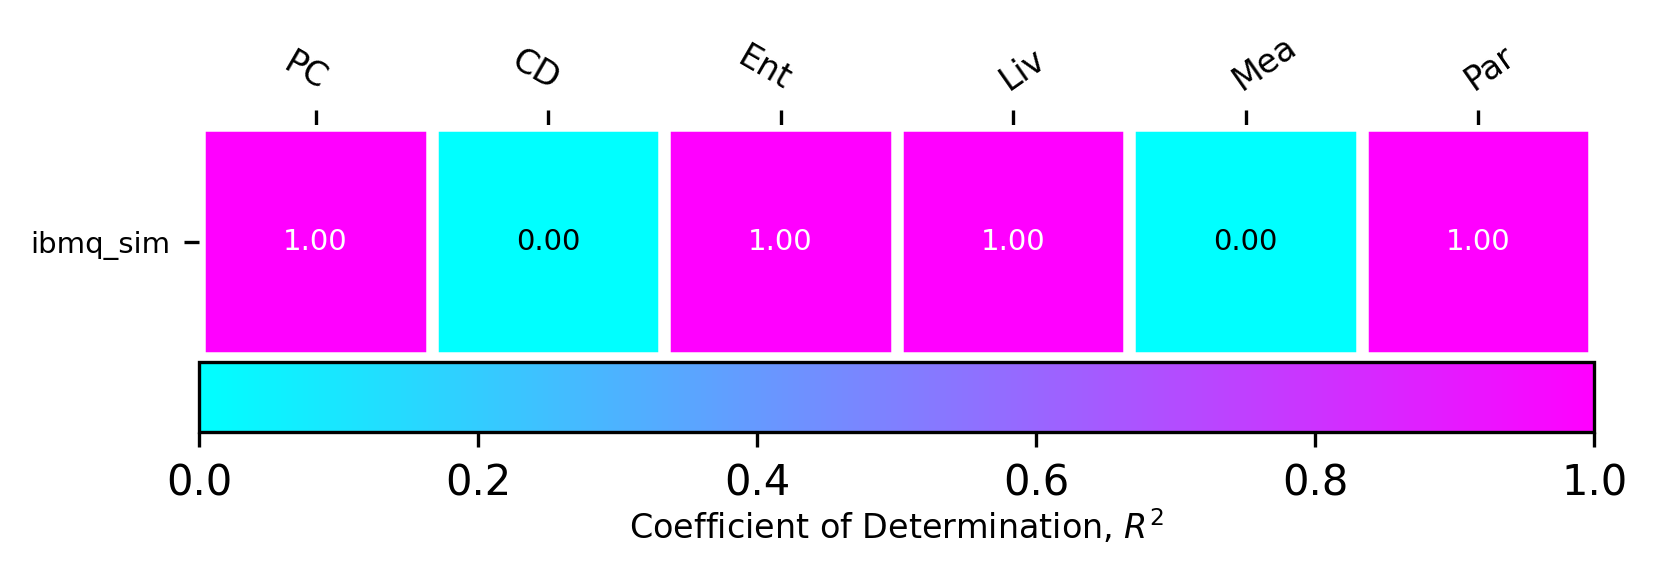

In [15]:
plot_correlations(
    benchmark_features,
    device_scores,
    ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    device_name="ibmq_sim",
)